In [8]:
import numpy as np
import pandas as pd
import networkx as nx
import pickle 
import causallearn as cl
import cdt
import os
import matplotlib.pyplot as plt

This script focuses on learning graphs for each of the conditions using different structure learning algorithms. Two types of algorithms are used - score based greedy algorithms and conditional independence test based algorithms

# Data Formatting

Selecting subsets of data that only include the genes of interest

In [26]:
path = os.getcwd()+"/normalized data/"

In [68]:
genes_oi = pd.read_csv(path+'genes_of_interest.csv')

resp_df = pd.read_csv(path+'respiratory_data.csv')
resp_meta = pd.read_csv(path+'respiratory_metadata.csv')

covid_df = pd.read_csv(path+'covid_data.csv')
covid_meta = pd.read_csv(path+'covid_metadata.csv')

In [69]:
np.unique(covid_meta.condition)

array(['Critical', 'Non-critical'], dtype=object)

In [ ]:
resp_oi_dict = {}
for c in np.unique(resp_meta.condition):
    temp_df = resp_df[(resp_df['genes'].isin(genes_oi['genes'].to_list()))][['genes']+resp_meta[resp_meta['condition'] == c]['sample'].to_list()]
    temp_df = temp_df.T
    temp_df.columns = temp_df.loc['genes']
    temp_df.drop(['genes'], axis = 0, inplace = True)
    resp_oi_dict[c] = temp_df
    
covid_oi_dict = {}
for c in np.unique(covid_meta.condition):
    temp_df = covid_df[(covid_df['genes'].isin(genes_oi['genes'].to_list()))][['genes']+covid_meta[covid_meta['condition'] == c]['sample'].to_list()]

In [63]:
resp_ctrl = resp_df[(resp_df['genes'].isin(genes_oi['genes'].to_list()))][['genes']+resp_meta[resp_meta['condition'] == "Parainfluenza_RespiratorySyncytial"]['sample'].to_list()]

resp_ctrl = resp_ctrl.T
resp_ctrl.columns = resp_ctrl.loc['genes']
resp_ctrl.drop(['genes'], axis = 0, inplace = True)
resp_ctrl.head()

genes,CACNA2D3,CACHD1,ZNF362,FMNL3,FBLN2,AIM2,PSMD6,GYG1,ANXA5,NDUFB6,...,BRCA2,ZNF740,COL6A2,ADAMTS10,ITPKB,ACKR3,N4BP3,ARHGAP18,GIGYF1,SURF6
DU09.03S12234,9.108016,7.233703,12.676562,13.212712,8.059405,12.49555,12.96602,12.97861,14.96681,11.17664,...,9.667833,13.26412,12.97946,11.82319,14.71661,8.644873,9.61333,11.12396,15.04157,12.5159
DU09.03S14677,8.385825,6.929688,12.6871,12.86401,7.918396,12.48093,13.01111,13.47673,14.82229,11.02441,...,9.776265,12.97455,12.40662,11.86043,14.58844,8.415148,8.804159,11.25947,14.97442,12.28504
DU10.01S03941,8.840297,6.632685,12.513313,12.638199,7.371425,14.08714,13.1046,14.11062,15.329,11.75183,...,10.31765,13.03474,12.67387,11.69151,14.3019,7.402488,8.663901,10.93799,15.01087,12.11651
DU10.01S04189,8.297919,6.471106,12.622191,11.634496,7.342196,14.12008,13.94657,16.52635,16.03593,12.13206,...,9.303659,13.00442,11.42911,10.60727,14.42121,6.94414,8.104814,10.58003,15.37952,12.4237
DU10.01S04464,9.420617,6.770507,12.921726,12.802765,7.818114,12.05556,13.0041,13.56658,14.54282,11.63089,...,8.801388,12.92059,12.91288,10.92398,14.55545,7.8416,9.188388,10.3639,15.39487,12.3143


trying causal discovery toolbox

In [29]:
from cdt.causality.graph import PC
from cdt.data import load_dataset
data, graph = load_dataset("sachs")

In [13]:
data = resp_ctrl.iloc[:,:50]

In [64]:
import time
start = time.time()
obj = PC()
output = obj.create_graph_from_data(resp_ctrl)
end = time.time()
print((end - start)/60)

0.017068850994110107


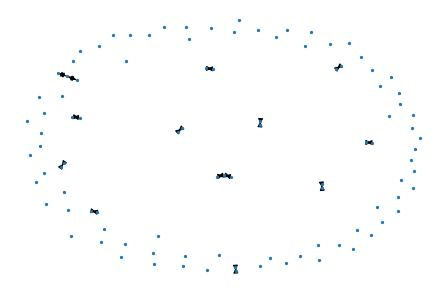

In [65]:
nx.draw(output, node_size = 5)
plt.show()

In [66]:
len(output.edges)

28